# Marketing A/B Testing Analysis

## Business Problem

Marketing companies invest significant resources in advertising campaigns, but not all campaigns lead to increased sales or customer conversions. Due to market complexity and varying customer behavior, it is difficult to determine whether advertisements genuinely influence purchasing decisions or if conversions would have occurred naturally without ads.

The core business challenge is to **measure the effectiveness of advertising campaigns** and **quantify the actual impact of ads on customer conversions**. Without this understanding, companies risk overspending on ineffective advertisements or misinterpreting campaign performance.

To address this issue, companies conduct **A/B testing**, where one group of users is exposed to advertisements (experimental group), while another group sees a public service announcement (PSA) or no ad at all (control group). The results of these experiments help businesses make data-driven decisions regarding future marketing investments.

---

## Research Questions

This study aims to answer the following research questions:

1. **Was the marketing campaign successful?**  
   This is evaluated by analyzing whether users exposed to advertisements showed a higher conversion rate compared to users in the control group.

2. **How much of the success can be attributed to advertisements?**  
   By comparing conversions between the ad group and the PSA group, we can estimate the incremental impact of ads on user purchasing behavior.

3. **Is the difference in conversion rates between the groups statistically significant?**  
   Statistical tests help determine whether observed differences occurred due to the campaign or by chance.

4. **Do factors such as the number of ads seen, time of day, or day of the week influence conversions?**  
   These insights can help optimize ad frequency and delivery timing.

---

## Data Description

The dataset used for this analysis is a **Marketing A/B Testing Dataset**, designed to evaluate the effectiveness of advertising campaigns through randomized experimentation.

Each row in the dataset represents an individual user who participated in the experiment. Users were randomly assigned to either an advertisement group or a control group that saw a public service announcement.

### Data Dictionary

- **Index**: Row index  
- **user_id**: Unique identifier for each user  
- **test_group**:  
  - `ad` → User was shown advertisements  
  - `psa` → User was shown a public service announcement  
- **converted**:  
  - `True` → User purchased the product  
  - `False` → User did not purchase the product  
- **total_ads**: Total number of advertisements shown to the user  
- **most_ads_day**: Day of the week when the user saw the highest number of ads  
- **most_ads_hour**: Hour of the day when the user saw the highest number of ads  

This dataset enables comparison between experimental and control groups, supports conversion analysis, and allows statistical validation of advertising effectiveness.

# Importing and Reading data:

In [75]:
# Importing Libraries
import numpy as np                   # used for numerical operations and mathematical computations.
import pandas as pd                  # used for data manipulation, cleaning, and analysis.
import matplotlib.pyplot as plt      # used for creating basic data visualizations such as line charts and bar graphs.
import seaborn as sns               # used for advanced and visually appealing statistical plots.
import warnings                      # Suppresses unnecessary warning messages to keep the notebook output clean.
warnings.filterwarnings("ignore")

In [77]:
# Reading data
df = pd.read_csv("D:\Chrome\marketing_ab_testing_analysis\data\marketing_AB.csv")

In [78]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [81]:
# checking if we have duplicates with respect to userId
df.duplicated(subset = 'user id').sum()

0

In [83]:
# dropping unwanted columns 
df.columns = df.columns.str.strip()
# removing extra spaces from column names to avoid errors
df.drop(['Unnamed: 0', 'user id'], axis = 1, inplace = True, errors = 'ignore')  
# axis = 1 because we are dropping a column but when we drop a row its value is 0.

In [85]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [87]:
# Checking how many unique values each categorical column has.
# we will consider 'most ads hour' column as categorical even though numerical values are written because the numerical value is automatically converted into hour i.e., 20 = 8pm, 22 = 10pm, 13 = 1pm
df_cat = df[['test group', 'converted', 'most ads day', 'most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [89]:
# now we will be displaying those unique values in each column
for i in df_cat.columns:
    print(i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


# Univariate Analysis:

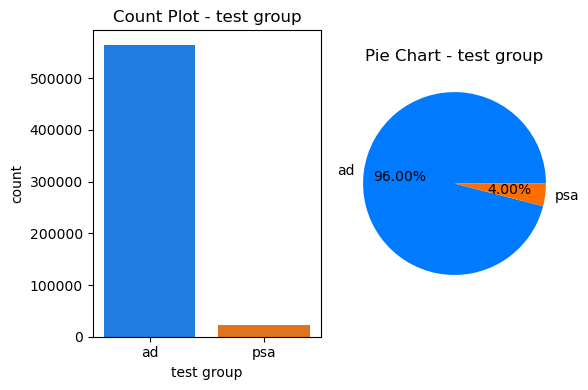

In [92]:
variable = 'test group'

colors = ['#007BFF', '#FF6F00']

plt.figure(figsize=(6, 4))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(
    x=variable,
    data=df_cat,
    order=df_cat[variable].value_counts().index,
    palette=colors
)
plt.title(f'Count Plot - {variable}')

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(
    counts,
    labels=counts.index,
    autopct='%0.2f%%',
    colors=colors
)
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()
plt.show()


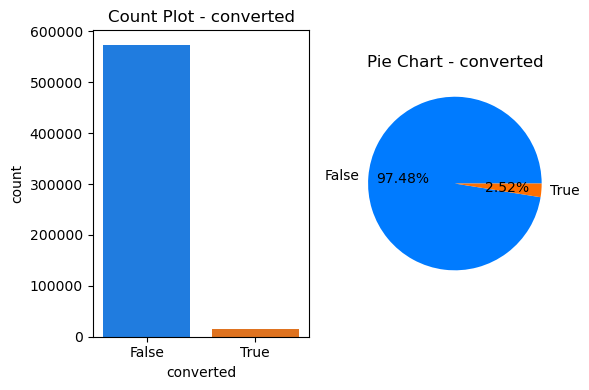

In [93]:
variable = 'converted'

colors = ['#007BFF', '#FF6F00']

plt.figure(figsize=(6, 4))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(
    x=variable,
    data=df_cat,
    order=df_cat[variable].value_counts().index,
    palette=colors
)
plt.title(f'Count Plot - {variable}')

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(
    counts,
    labels=counts.index,
    autopct='%0.2f%%',
    colors=colors
)
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()
plt.show()


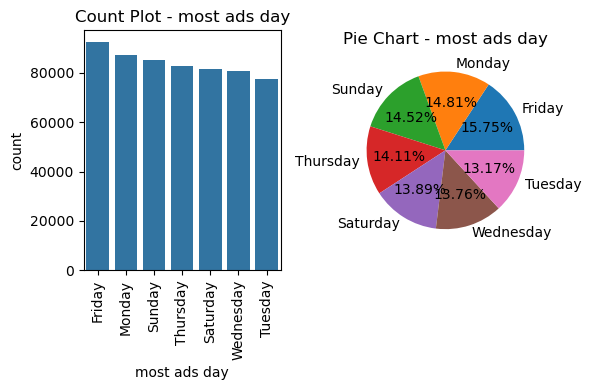

In [94]:
variable = 'most ads day'

plt.figure(figsize=(6, 4))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(
    x=variable,
    data=df_cat,
    order=df_cat[variable].value_counts().index
)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation=90)

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(
    counts,
    labels=counts.index,
    autopct='%0.2f%%'
)
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()
plt.show()


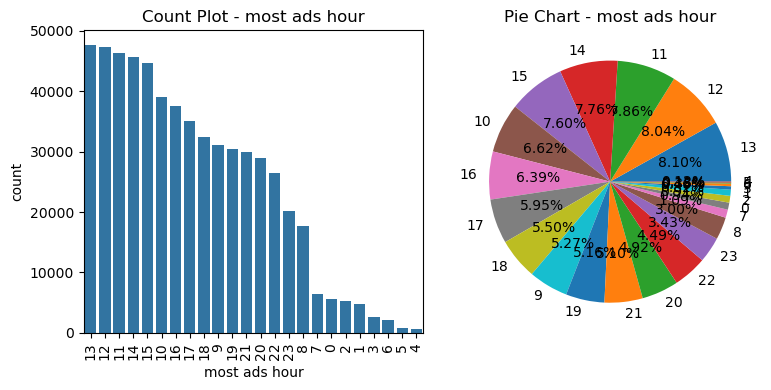

In [95]:
variable = 'most ads hour'

plt.figure(figsize=(8, 4))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(
    x=variable,
    data=df_cat,
    order=df_cat[variable].value_counts().index
)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation=90)

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(
    counts,
    labels=counts.index,
    autopct='%0.2f%%'
)
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()
plt.show()


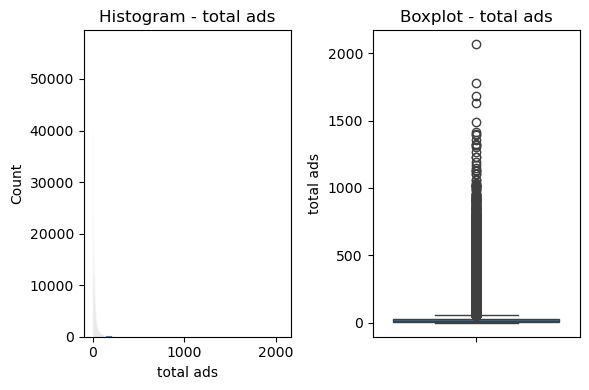

In [96]:
variable = 'total ads'

plt.figure(figsize=(6, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data=df)
plt.title(f'Histogram - {variable}')

# Pie chart
plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data=df)
plt.title(f'Boxplot - {variable}')

# Adjust layout
plt.tight_layout()
plt.show()


In [97]:
# checking descriptive stats of the 'total ads' feature
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

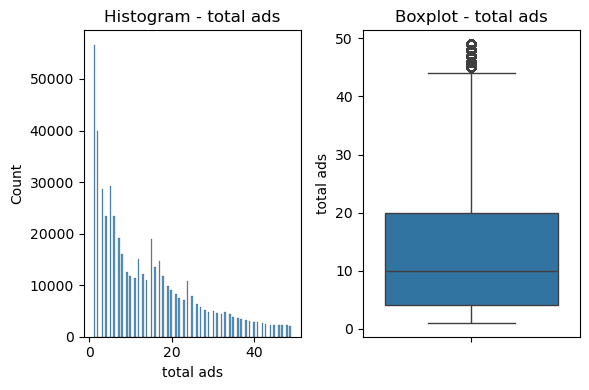

In [99]:
variable = 'total ads'

plt.figure(figsize=(6, 4))

# Histogram
plt.subplot(1, 2, 1)
# here we are filtering the value closer to 75th percentile for better visualization
sns.histplot(x=variable, data=df[df['total ads'] < 50])
plt.title(f'Histogram - {variable}')

# Pie chart
plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data=df[df['total ads'] < 50])
plt.title(f'Boxplot - {variable}')

# Adjust layout
plt.tight_layout()
plt.show()


# Bivariate Analysis:

In [101]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [102]:
# Conversion rate by test group = Out of users in each test group, what % converted?
ct_conversion_test_group = pd.crosstab(
    df['test group'],
    df['converted'],
    normalize='index'
)
# pd.crosstab() creates a contingency table
# Rows -> test group (e.g., control vs test)
# Columns -> converted (True / False)
# normalize='index' -> Converts raw counts into row-wise percentages, Each row sums to 1 (or 100%)

In [104]:
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Axes: xlabel='test group'>

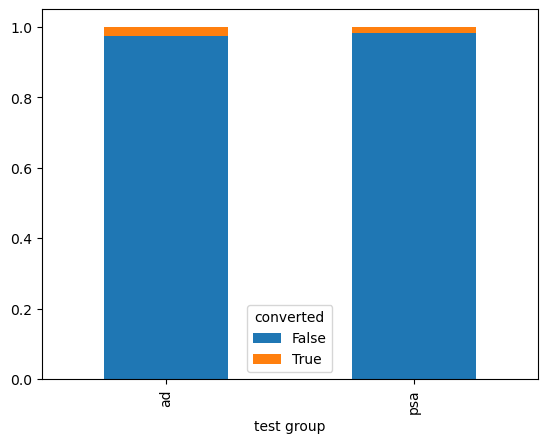

In [105]:
ct_conversion_test_group.plot.bar(stacked = True)

In [106]:
# Conversion rate by most ads day = On which day are users more likely to convert?
ct_conversion_day = pd.crosstab(
    df['most ads day'],
    df['converted'],
    normalize='index'
)
# Rows -> day of week
# Columns -> converted status

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


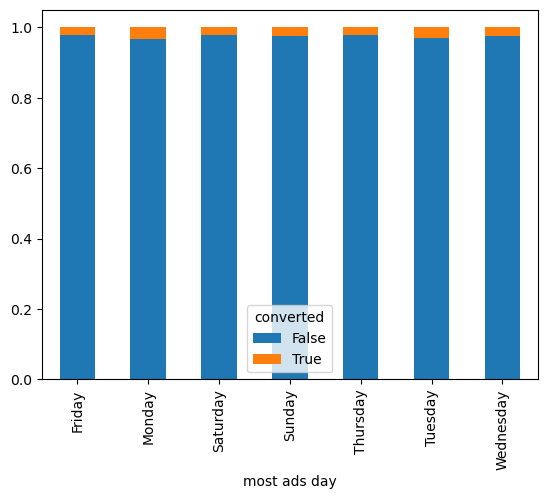

In [107]:
# Sorts the table by conversion = True with highest conversion day at top using ascending = False
print(ct_conversion_day.sort_values(by=True, ascending=False))
ct_conversion_day.plot.bar(stacked=True); 

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


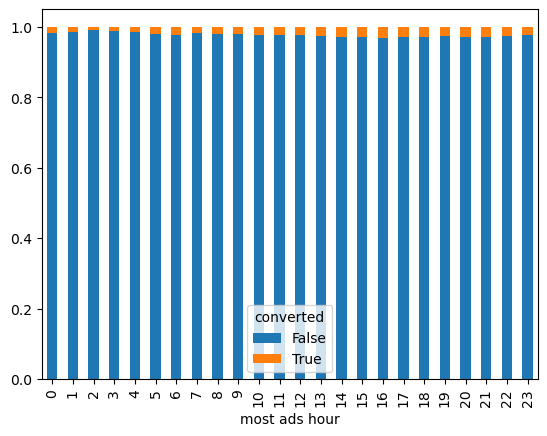

In [109]:
# Conversion rate by most ads hour = At which hour do ads convert better?
ct_conversion_hour = pd.crosstab(
    df['most ads hour'],
    df['converted'],
    normalize='index'
)
print(ct_conversion_hour.sort_values(by=True, ascending=False))
ct_conversion_hour.plot.bar(stacked=True);

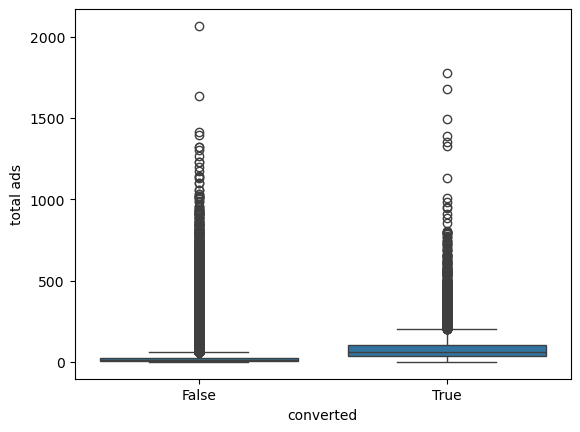

In [110]:
sns.boxplot(x='converted', y='total ads', data=df);

<Axes: xlabel='converted', ylabel='total ads'>

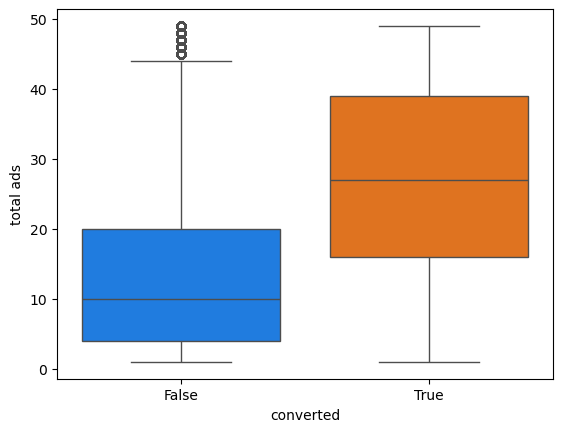

In [111]:
sns.boxplot(
    x='converted',
    y='total ads',
    data=df[df['total ads'] < 50],
    palette={'True' : '#FF6F00', 'False' : '#007BFF'}
)

# Statistical Tests:

In [114]:
# Chi-square test is used to test relationship between two categorical values = Is conversion dependent on test group / day / hour?
from scipy.stats import chi2_contingency

alpha = 0.05    # 0.05 = 5% risk
# p < 0.05 → significant 
# p ≥ 0.05 → not significant


# Looping Through All Categorical Variables except the value = 'converted' itself.
for variable in df_cat.columns:
    if variable != 'converted':

        # Create a contingency table (cross-tabulation)
        contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])

        # Perform chi-squared test
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Display the results
        print(f"\nChi-squared test for {variable} vs. converted:")
        print(f"Chi-squared value: {chi2}")
        print(f"p-value: {p}")

        # Check for significance
        if p < alpha:
            print(f"The difference in conversion rates across {variable} is statistically significant.")
        else:
            print(f"There is no significant difference in conversion rates across {variable}.")



Chi-squared test for test group vs. converted:
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates across test group is statistically significant.

Chi-squared test for most ads day vs. converted:
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significant.

Chi-squared test for most ads hour vs. converted:
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically significant.


In [115]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [116]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
# shapiro → normality test
# levene → equality of variances
# ttest_ind → independent t-test
# mannwhitneyu → non-parametric alternative


# Step 1: Check Assumptions

# Normality assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(
    df[df['converted'] == True]['total ads']
)

shapiro_stat_false, shapiro_p_value_false = shapiro(
    df[df['converted'] == False]['total ads']
)

print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

# Equality of variances assumption
levene_stat, levene_p_value = levene(
    df[df['converted']]['total ads'],
    df[~df['converted']]['total ads']
)

print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

# Choosing the right test:
#     Condition	                        Test to Use

# 1.) Normal + equal variance	        Independent t-test
# 2.) Normal + unequal variance	        Welch’s t-test
# 3.) Not normal	                    Mann–Whitney U

Shapiro-Wilk test for normality (True group): p-value = 1.638680987007771e-98
Shapiro-Wilk test for normality (False group): p-value = 9.883049430735801e-204
Levene's test for equality of variances: p-value = 0.0


In [117]:
# Step 2: Perform a Suitable Test
alpha = 0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    # Assumptions met – use t-test for means
    t_stat, t_p_value = ttest_ind(
        df[df['converted']]['total ads'],
        df[~df['converted']]['total ads']
    )
    print(f"Independent two-sample t-test: p-value = {t_p_value}")

else:
    # Assumptions not met – use Mann–Whitney U test for medians
    u_stat, u_p_value = mannwhitneyu(
        df[df['converted']]['total ads'],
        df[~df['converted']]['total ads']
    )
    print(f"Mann-Whitney U test: p-value = {u_p_value}")

# Since both normality and equal variance assumptions were violated,
# we used the Mann–Whitney U test instead of the independent t-test.

Mann-Whitney U test: p-value = 0.0
